# importing_libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Linear regression

y = $ax$ + b

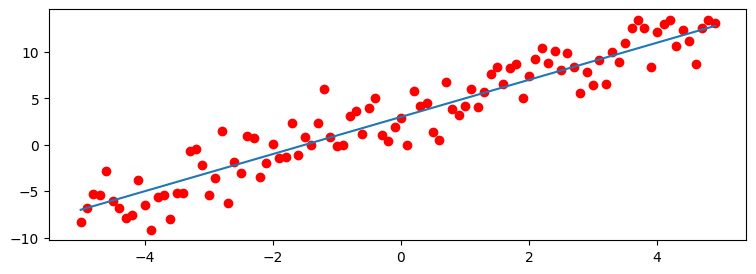

In [2]:
x = np.arange(-5, 5, 0.1)
a = 2
b = 3
y = a*x + b
y_noise = 2*np.random.normal(size=x.size)
y_new = y + y_noise

#Plot

plt.figure(figsize=(9,3))
plt.plot(x, y_new, 'ro')
plt.plot(x, y)
plt.show()

# Some types of non-linear functions

$ \ y = a x^3 + b x^2 + c x + d \ $

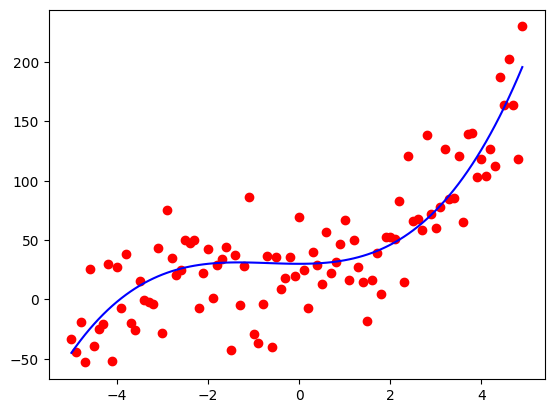

In [3]:
x = np.arange(-5, 5, 0.1)
a = 1
b = 1
c = 1
d = 30
y = a*(x**3) + b*(x**2) + x*(x**1) + d
y_noise = 30 * np.random.normal(size = x.size)
y_new = y + y_noise

#plot
plt.plot(x, y_new, 'ro')
plt.plot(x,y,'b')
plt.show()

## Quadratic

$ Y = X^2 $

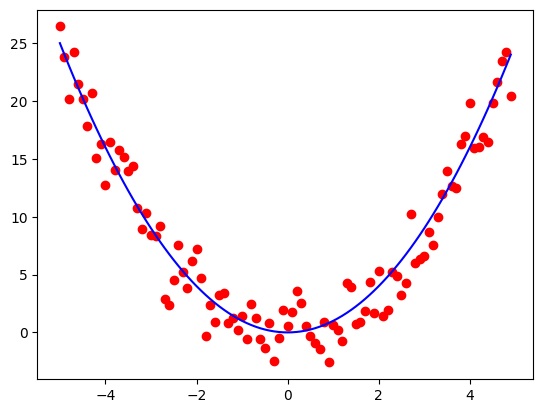

In [4]:
x = np.arange(-5, 5, 0.1)
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
y_new = y + y_noise

#plot
plt.plot(x, y_new, 'ro')
plt.plot(x,y,'b')
plt.show()

## Exponential

$ Y = a + b c^X$

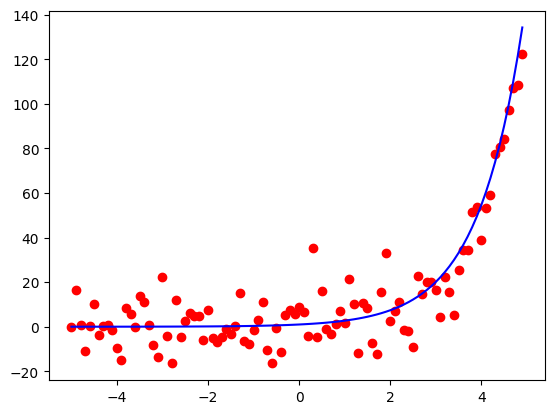

In [5]:
x = np.arange(-5, 5, 0.1)
y = np.exp(x)
y_noise = 10 * np.random.normal(size = x.size)
y_new = y + y_noise

#plot
plt.plot(x, y_new, 'ro')
plt.plot(x,y,'b')
plt.show()

## logarithms

 $ y = \log(x)$

<ipython-input-6-30fa85e77152>:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


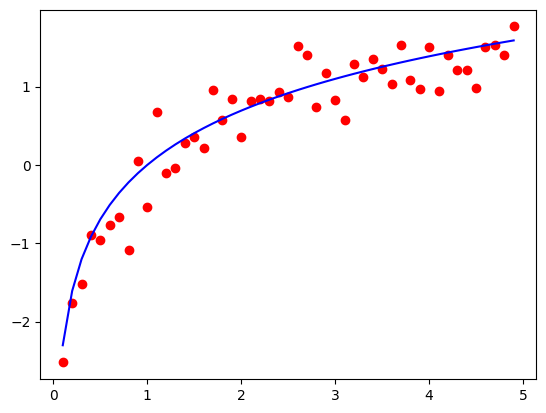

In [6]:
x = np.arange(-5, 5, 0.1)
y = np.log(x)
y_noise = 0.3 * np.random.normal(size = x.size)
y_new = y + y_noise

#plot
plt.plot(x, y_new, 'ro')
plt.plot(x,y,'b')
plt.show()

## Sigmoidal/Logistic

$ Y = a + \frac{b}{1+ c^{(X-d)}}$


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/basic.py:375: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <= np.arange(-5.0, 5.0, 0.1)>
Valid modes: ['Plain', 'Context', 'Verbose', 'Minimal']
  warn('Error changing %s exception modes.\n%s' %


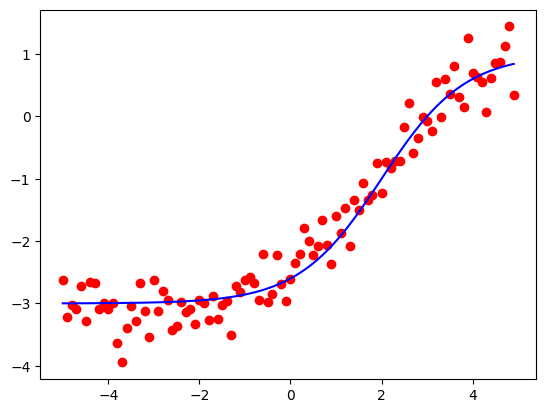

In [7]:
%xmode = np.arange(-5.0, 5.0, 0.1)
a = 1
b = -4
c = 3
d = 2

y = a+b/(1+np.power(c, x-d))
y_noise = 0.3 * np.random.normal(size = x.size)
y_new = y + y_noise

#plot
plt.plot(x, y_new, 'ro')
plt.plot(x,y,'b')
plt.show()

# Importing dataset

In [8]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

2023-06-18 12:17:13 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [9]:
df = pd.read_csv("china_gdp.csv")

In [10]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


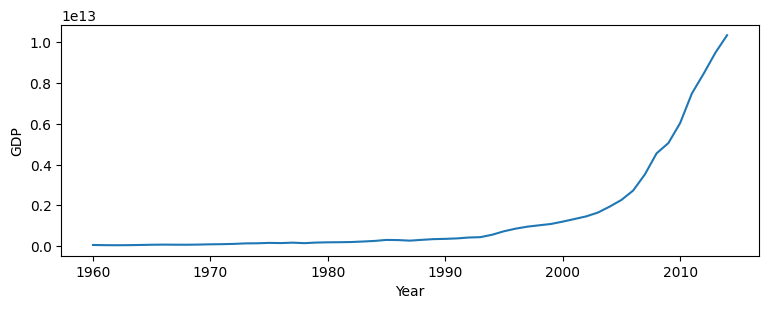

In [11]:
plt.figure(figsize=(9,3))
plt.plot(df["Year"], df["Value"])
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Modeling

$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$

In [12]:
def sigmoid(x, B1, B2):
     y = 1 / (1 + np.exp(-B1*(x-B2)))
     return y

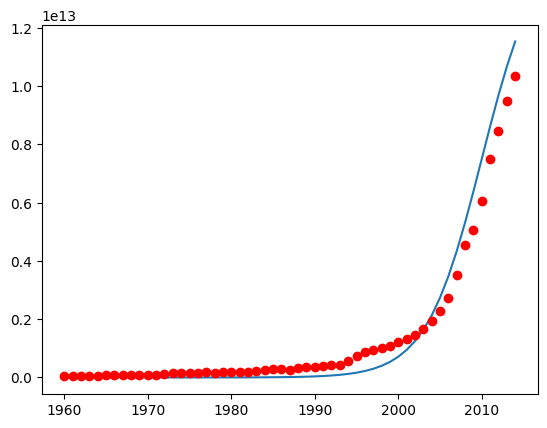

In [13]:
B1 = 0.3
B2 = 2010

#logistic function
Y_pred = sigmoid(df["Year"], B1 , B2)

#plot
plt.plot(df["Year"], Y_pred*15000000000000.)
plt.plot(df["Year"], df["Value"], 'ro')

# Best Parameters

In [14]:
# Normalizing
x_norm = df["Year"] / max(df["Year"])
y_norm = df["Value"] / max(df["Value"])

**curve_fit** uses non-linear least squares to fit sigmoid function.


In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print(" B1 = %f, B2 = %f" % (popt[0], popt[1]))

 B1 = 690.451709, B2 = 0.997207


popt are our optimized parameters.

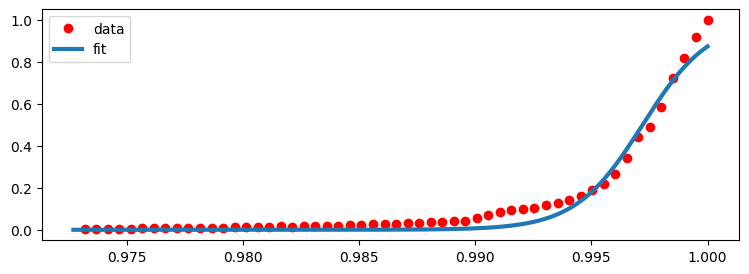

In [16]:
x = np.linspace(1960, 2015, 1000)
#normalising
x = x/max(x)
y = sigmoid(x, *popt)
plt.figure(figsize=(9,3))
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.show()

# Calculate  accuracy of the model

In [17]:
from sklearn.metrics import r2_score
score = r2_score(Y_pred, df["Value"])
mse = np.mean((Y_pred - df["Value"] ) ** 2)
abs = np.mean(np.absolute((Y_pred - df["Value"] )))
print("Score: ",score)
print("MSE: ",mse)
print("ABS: ",abs)

Score:  -2.134126706886272e+26
MSE:  8.20186830855766e+24
ABS:  1437041815987.4
